In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',33)

In [2]:
df_mat = pd.read_pickle('df_mat.pkl')

df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## G3

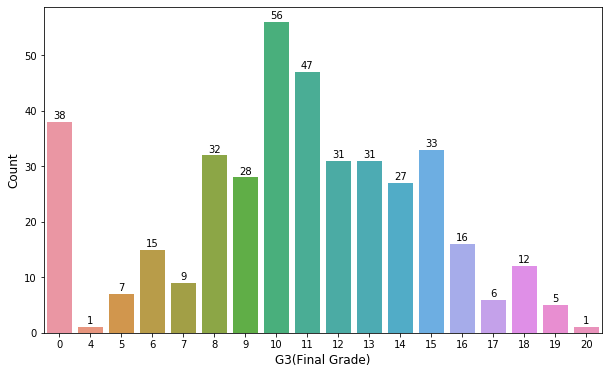

In [3]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_mat['G3'])
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

In [4]:
df_mat['G3'].value_counts().sort_index(ascending = False)

20     1
19     5
18    12
17     6
16    16
15    33
14    27
13    31
12    31
11    47
10    56
9     28
8     32
7      9
6     15
5      7
4      1
0     38
Name: G3, dtype: int64

In [5]:
print('The Median of G3(Final Grade) is: {}'.format(round(df_mat['G3'].median(),2)))
print('The Mean of G3(Final Grade) is: {}'.format(round(df_mat['G3'].mean(),2)))

The Median of G3(Final Grade) is: 11.0
The Mean of G3(Final Grade) is: 10.42


In [6]:
df_mat['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

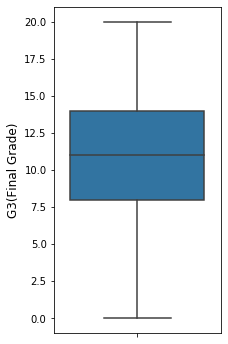

In [7]:
plt.figure(figsize = (3,6))
sns.boxplot(df_mat['G3'],orient = 'v')
plt.ylabel('G3(Final Grade)',fontsize = 12);

## school

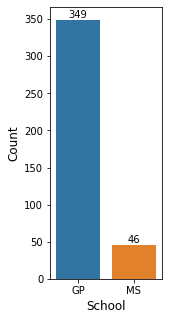

In [8]:
plt.figure(figsize = (2,5))
ax = sns.countplot(df_mat['school'])
plt.xlabel('School',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 3,p.get_height(),ha = 'center')

## Influencia de la Localización del Domicilio

In [9]:
df_mat_place = df_mat[['school','address','traveltime','G3']]

df_mat_place.head()

,school,address,traveltime,G3
0,GP,U,2,6
1,GP,U,1,6
2,GP,U,1,10
3,GP,U,1,15
4,GP,U,1,10


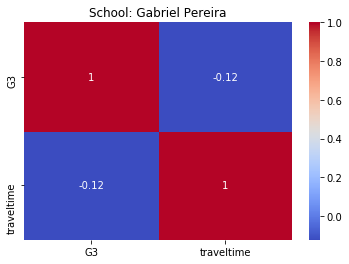

In [10]:
plt.figure()
ax = sns.heatmap(df_mat_place[df_mat_place['school'] == 'GP'].corr(),annot = True,cmap = 'coolwarm')
ax.invert_xaxis()
ax.set_ylim([0,2])
ax.set_title('School: Gabriel Pereira');

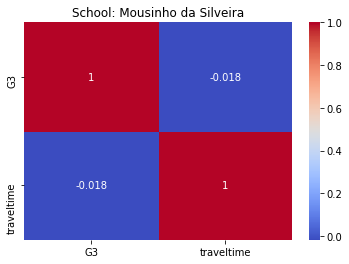

In [11]:
plt.figure()
ax = sns.heatmap(df_mat_place[df_mat_place['school'] == 'MS'].corr(),annot = True,cmap = 'coolwarm')
ax.invert_xaxis()
ax.set_ylim([0,2])
ax.set_title('School: Mousinho da Silveira');

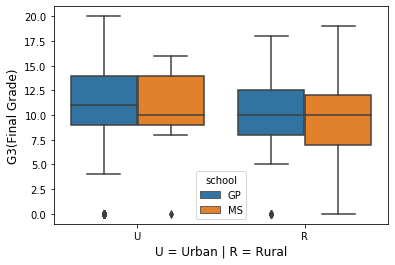

In [12]:
sns.boxplot(data = df_mat_place,x = 'address',y = 'G3',hue = 'school')
plt.xlabel('U = Urban | R = Rural',fontsize = 12)
plt.ylabel('G3(Final Grade)',fontsize = 12);

## A partir de aquí

In [13]:
df_mat_histograms = df_mat.drop('G3',axis = 1)

In [14]:
df_mat.shape

(395, 33)

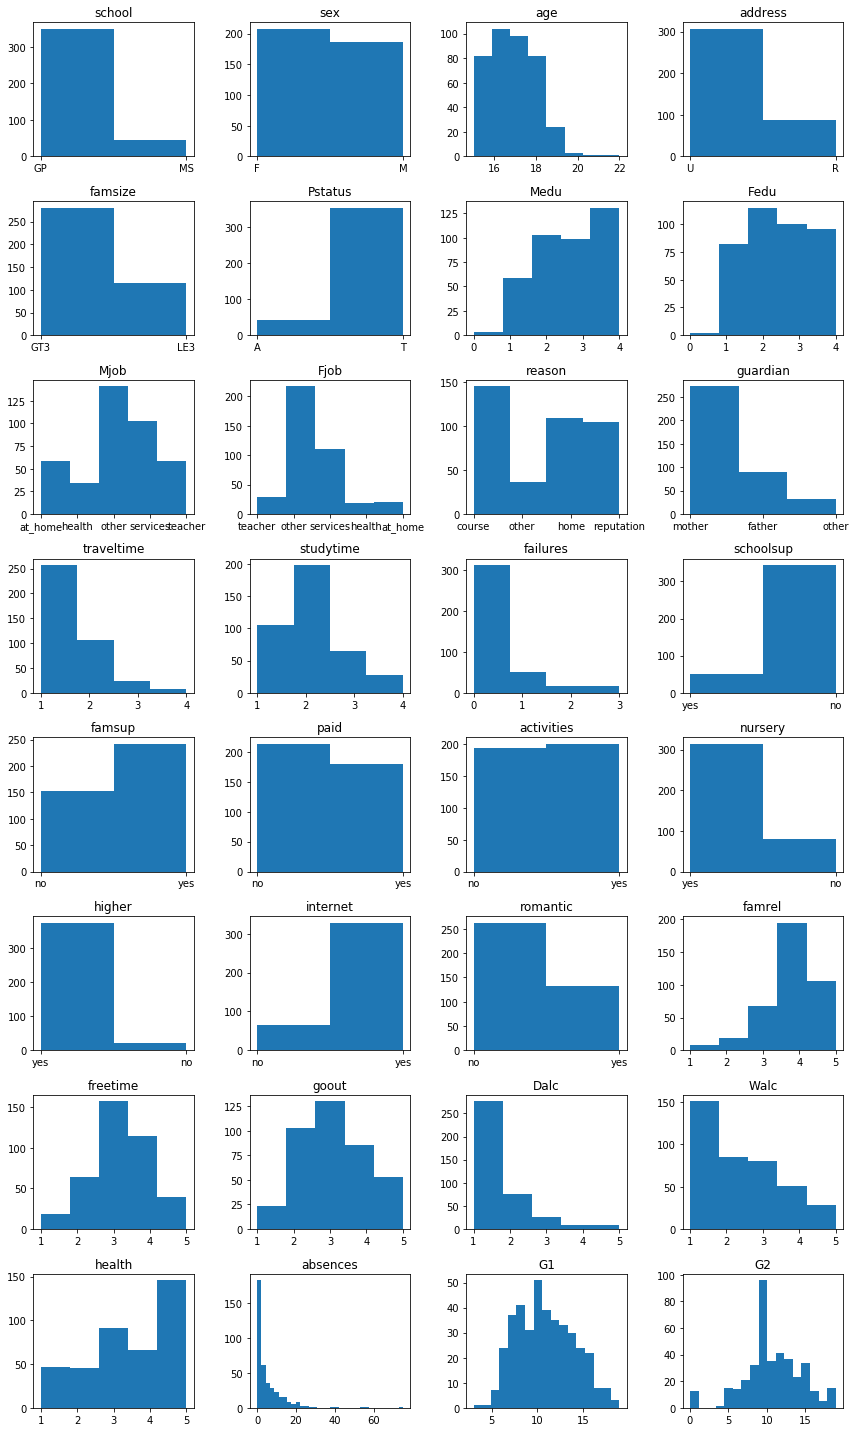

In [15]:
fig = plt.figure(figsize = (12,20))
for i in range(1,df_mat_histograms.shape[1] + 1):
    plt.subplot(8,4,i)
    ax = plt.gca()
    ax.set_title(df_mat_histograms.columns[i - 1],fontsize = 12)
    ax.tick_params(axis = 'x')
    n_unique_values = len(df_mat_histograms.iloc[:,i - 1].unique())
    plt.hist(df_mat_histograms.iloc[:,i - 1],bins = n_unique_values)
fig.tight_layout();

In [16]:
df_mat['school'] = df_mat['school'].apply(lambda x: 1 if x == 'GP' else 0)
df_mat['sex'] = df_mat['sex'].apply(lambda x: 1 if x == 'F' else 0)
df_mat['address'] = df_mat['address'].apply(lambda x: 1 if x == 'U' else 0)
df_mat['famsize'] = df_mat['famsize'].apply(lambda x: 1 if x == 'GT3' else 0)
df_mat['Pstatus'] = df_mat['Pstatus'].apply(lambda x: 1 if x == 'T' else 0)

In [17]:
binary_variables = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

for v in binary_variables:
    df_mat[v] = df_mat[v].apply(lambda x: 1 if x == 'yes' else 0)

In [18]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,0,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,1,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,1,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


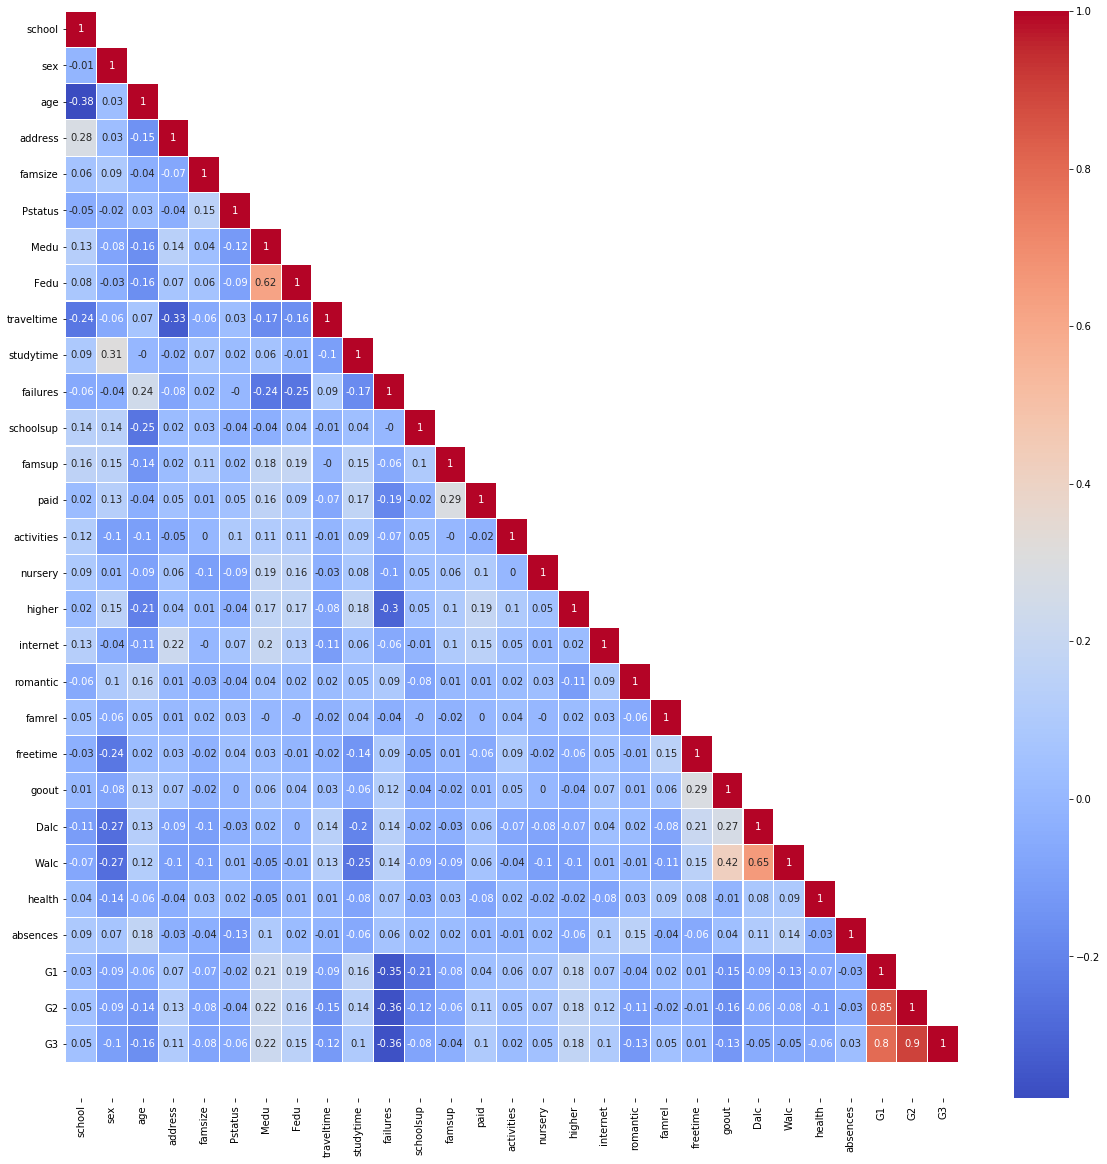

In [19]:
df_corr = df_mat.corr().round(2)

mask = np.ones(df_corr.shape,dtype = bool)
mask[np.tril_indices_from(mask)] = False

f,ax = plt.subplots(figsize = (20,20))
ax = sns.heatmap(df_corr,mask = mask,annot = True,cmap = 'coolwarm',linewidth = 0.1,linecolor = 'white')
ax.set_ylim([30,0]);

In [20]:
categorical_feats = df_mat.dtypes[df_mat.dtypes == 'object'].index
df_corr = df_mat.drop(categorical_feats,axis = 1)

In [21]:
def print_correlation_table(variable):
    correlation_abs = round(df_corr.corr()[variable].abs(),2)
    correlation_type = df_corr.corr()[variable].apply(lambda x: 'Pos' if x >= 0 else 'Neg')
    correlation = pd.concat([correlation_abs,correlation_type],axis = 1,keys = ['correlation','type'])
    correlation = correlation.sort_values('correlation',ascending = False)
    return correlation

In [22]:
print_correlation_table('G3')

,correlation,type
G3,1.00,Pos
G2,0.90,Pos
G1,0.80,Pos
failures,0.36,Neg
Medu,0.22,Pos
higher,0.18,Pos
age,0.16,Neg
Fedu,0.15,Pos
romantic,0.13,Neg
goout,0.13,Neg


In [23]:
df_mat['Mjob'].value_counts(normalize = True)

other       0.356962
services    0.260759
at_home     0.149367
teacher     0.146835
health      0.086076
Name: Mjob, dtype: float64